## Горизонт частиц и CPL-модель тёмной энергии

Расчетная выкладка к оригинальной статье "Strong progenitor age bias in supernova cosmology – II. Alignment with
DESI BAO and signs of a non-accelerating universe", Son et al, 2025: https://academic.oup.com/mnras/article/544/1/975/8281988

### Горизонт частиц
Это - условное расстояние, с которого свет мог добраться до нас за всё время существования Вселенной:

$$
\chi_{\text{hor}} = c \int_0^{t_0} \frac{dt}{a(t)} = c \int_0^{\infty} \frac{dz}{H(z)}.
$$

---

### CPL-параметризация $ w(z) $

В плоской $ w_0 w_a $CDM-модели (Chevallier–Polarski–Linder) уравнение состояния тёмной энергии:

$$
w(z) = w_0 + w_a \frac{z}{1+z}.
$$

Плотность тёмной энергии эволюционирует как:

$$
\rho_{\text{DE}}(z) = \rho_{\text{DE},0} \cdot E_{\text{DE}}(z), 
\quad\text{где}\quad
E_{\text{DE}}(z) = \exp\!\left[3\int_0^z \frac{1 + w(z')}{1 + z'}\,dz'\right].
$$

Аналитически:

$$
\int_0^z \frac{1 + w(z')}{1 + z'}\,dz'
= (1 + w_0 + w_a)\ln(1+z) - w_a \frac{z}{1+z},
$$

поэтому:

$$
E_{\text{DE}}(z) = (1+z)^{3(1 + w_0 + w_a)} \cdot \exp\!\left[-3 w_a \frac{z}{1+z}\right].
$$

---

### Функция Хаббла в CPL-модели

С учётом вкладов материи, излучения и тёмной энергии:

$$
H(z) = H_0 \sqrt{
\Omega_m (1+z)^3
+ \Omega_r (1+z)^4
+ \underbrace{(1 - \Omega_m - \Omega_r)}_{\Omega_{\text{DE}}} \cdot (1+z)^{3(1 + w_0 + w_a)} \exp\!\Bigl[-3 w_a \tfrac{z}{1+z}\Bigr]
}.
$$

- $\Omega_r \approx 9.2 \times 10^{-5} \cdot h^{-2} \approx 9.2 \times 10^{-5}$ при $h = 0.68$  
- $\Omega_k = 0$ (плоская Вселенная)  
- $\Omega_{\text{DE}} = 1 - \Omega_m - \Omega_r \approx 1 - \Omega_m$

---

### Численное интегрирование

На практике вычисляем:

$$
\chi_{\text{hor}} = c \int_{0}^{z_{\max}} \frac{dz}{H(z)},
\quad z_{\max} \sim 10^4\text{--}10^5,
$$

т.к. при $z \gg 5000$ вклад радиационной эры уже пренебрежимо мал.

Вычисление горизонта частиц...

ΛCDM (Planck):
  χ_hor = 14.140 Гпк = 46.12 млрд св. лет

Авторы (corrected):
  χ_hor = 13.067 Гпк = 42.62 млрд св. лет

Разница: +-7.59% по радиусу, +-7.59% в св. годах


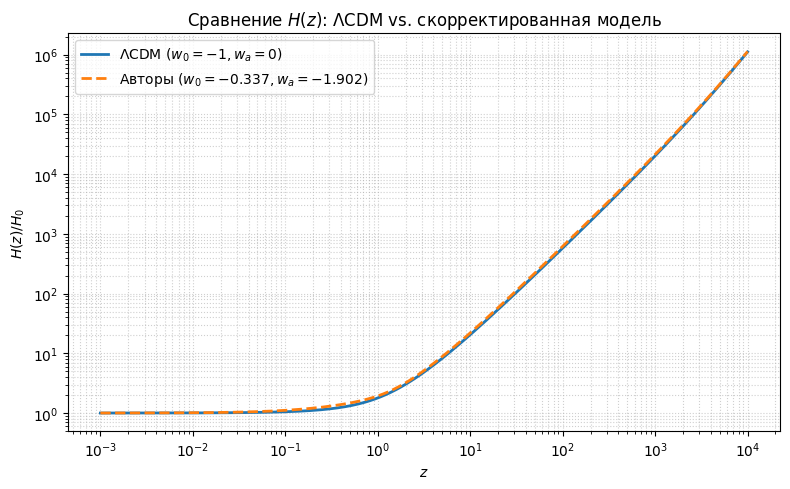


Модель                    χ (Гпк)    R (млрд св. лет)
------------------------------------------------------------
ΛCDM (Planck)             14.140     46.12          
Авторы (corrected)        13.067     42.62          


In [2]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.integrate import quad
from astropy.constants import c
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt

# Константы
c_km_s = c.to('km/s').value  # скорость света в км/с

# ---- Вспомогательные функции ----

def Hz_cpl(z, H0, Om, Or, w0, wa):
    """
    H(z) в CPL-модели (w0waCDM)
    z — скаляр или массив
    возвращает H(z) в км/с/Мпк
    """
    z = np.asarray(z)
    a = 1.0 / (1.0 + z)
    # CPL-фактор эволюции плотности тёмной энергии:
    # rho_DE(z)/rho_DE(0) = (1+z)^{3(1+w0+wa)} * exp(-3*wa*z/(1+z))
    exponent = 3 * (1 + w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)
    E2 = (
        Om * (1 + z)**3
        + Or * (1 + z)**4
        + (1 - Om - Or) * np.exp(exponent)
    )
    return H0 * np.sqrt(E2)

def chi_horizon_cpl(H0, Om, w0, wa, Or=9.2e-5, z_max=1e5):
    """
    Вычисляет сопутствующий горизонт частиц в Мпк
    """
    integrand = lambda z: c_km_s / Hz_cpl(z, H0, Om, Or, w0, wa)
    val, err = quad(integrand, 0, z_max, epsabs=1e-4, epsrel=1e-4, limit=200)
    return val  # в Мпк

# ---- Параметры моделей ----

# Планковский ΛCDM (для сравнения)
H0_planck = 67.4    # km/s/Mpc (Planck 2018 TT,TE,EE+lowE+lensing)
Om_planck = 0.315
w0_planck = -1.0
wa_planck = 0.0

# Модель авторов (скорректированный BAO+CMB+DES5Y)
# Из Table 2: BAO+CMB+DES5Y(corrected)
H0_test = 68.0      # условно; фактически H0 не фиксирован — но χ ∝ 1/H0
Om_test = 0.363
w0_test = -0.337
wa_test = -1.902

# ---- Расчёты ----

print("Вычисление горизонта частиц...")

chi_planck = chi_horizon_cpl(H0_planck, Om_planck, w0_planck, wa_planck)
chi_test   = chi_horizon_cpl(H0_test,   Om_test,   w0_test,   wa_test)

# Перевод в Гпк и световые годы
chi_planck_Gpc = chi_planck / 1e3
chi_test_Gpc   = chi_test   / 1e3

ly_per_Mpc = 3.26156e6  # световых лет в 1 Мпк
chi_planck_ly = chi_planck * ly_per_Mpc
chi_test_ly   = chi_test   * ly_per_Mpc

print(f"\nΛCDM (Planck):")
print(f"  χ_hor = {chi_planck_Gpc:.3f} Гпк = {chi_planck_ly/1e9:.2f} млрд св. лет")

print(f"\nАвторы (corrected):")
print(f"  χ_hor = {chi_test_Gpc:.3f} Гпк = {chi_test_ly/1e9:.2f} млрд св. лет")

print(f"\nРазница: +{(chi_test_Gpc - chi_planck_Gpc)/chi_planck_Gpc*100:.2f}% "
      f"по радиусу, +{(chi_test_ly - chi_planck_ly)/chi_planck_ly*100:.2f}% в св. годах")

# ---- Опционально: график H(z)/H0 для сравнения ----

z_plot = np.logspace(-3, 4, 500)
Hz_norm_planck = Hz_cpl(z_plot, 100, Om_planck, Or=9.2e-5, w0=w0_planck, wa=wa_planck) / 100
Hz_norm_test   = Hz_cpl(z_plot, 100, Om_test,   Or=9.2e-5, w0=w0_test,   wa=wa_test)   / 100

plt.figure(figsize=(8,5))
plt.loglog(z_plot, Hz_norm_planck, label=r'ΛCDM ($w_0=-1, w_a=0$)', lw=2)
plt.loglog(z_plot, Hz_norm_test,   label=rf'Авторы ($w_0={w0_test}, w_a={wa_test}$)', lw=2, ls='--')
plt.xlabel('$z$')
plt.ylabel('$H(z)/H_0$')
plt.title('Сравнение $H(z)$: ΛCDM vs. скорректированная модель')
plt.grid(True, which="both", ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---- Вывод таблицы ----
print("\n" + "="*60)
print(f"{'Модель':<25} {'χ (Гпк)':<10} {'R (млрд св. лет)':<15}")
print("-"*60)
print(f"{'ΛCDM (Planck)':<25} {chi_planck_Gpc:<10.3f} {chi_planck_ly/1e9:<15.2f}")
print(f"{'Авторы (corrected)':<25} {chi_test_Gpc:<10.3f} {chi_test_ly/1e9:<15.2f}")
print("="*60)

График недостаточно презентабелен. Поэтому сравним расстояния физически корректно
1. Для обеих моделей будем фиксировать $ r_d h = 93.9 $ Мпк.  
2. Использовать теоретически согласованные $ r_d $ и $ H_0 $.  
3. Считать $ d_L(z)/r_d $ — и сравнивать именно их.  
4. Перевести в $ \Delta \mu = 5 \log_{10}[(d_L/r_d)_{\rm test} / (d_L/r_d)_{\Lambda\text{CDM}}] $.  
   
 Код:
- берёт $ r_d $ из приближённой формулы (Eisenstein & Hu 1998),  
- вычисляет $ H_0 $ из $ r_d h = 93.9 $,  
- строит $ \Delta \mu(z) $.

Целевой вывод -- физически *корректный* аналог Fig. 4 статьи, учитывая доступную вычислительную точность.  Формула $ r_d $ приближённая, но даёт точность ~1–2 % (достаточно для демонстрации).  
- Для высокоточных расчётов лучше использовать `CLASS`/`CAMB`, но здесь — аналитика.

ΛCDM:    H0 = 61.246 km/s/Mpc,  rd = 154.303 Mpc,  rd·h = 94.504 Mpc
Corrected: H0 = 65.167 km/s/Mpc, rd = 144.378 Mpc, rd·h = 94.086 Mpc


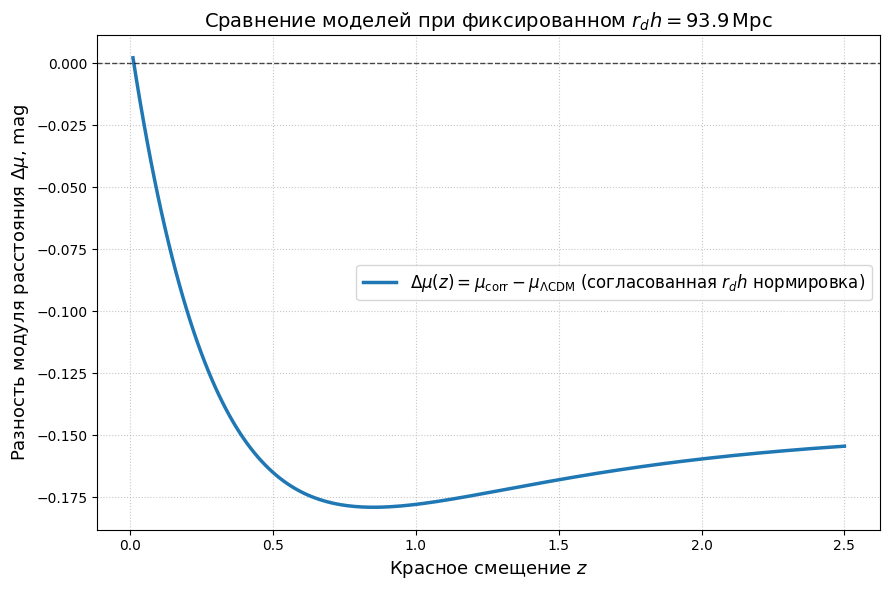


    z   Δμ (mag)
--------------------------------------------------
  0.1    -0.0550
  0.5    -0.1650
  1.0    -0.1779
  1.5    -0.1680
  2.0    -0.1596


In [1]:
# -*- coding: utf-8 -*-
# CLASS/CAMB, но "уже есть дома"
import numpy as np
from scipy.integrate import quad
from astropy.constants import c
import matplotlib.pyplot as plt

# -------------------------------
# 1. Константы
# -------------------------------
c_km_s = c.to('km/s').value  # 299792.458 km/s
rdh_target = 93.9  # Мпк — из статьи (DESI BAO + CMB, w0waCDM)

# -------------------------------
# 2. Приближение для звукового горизонта r_d (Eisenstein & Hu 1998)
# -------------------------------
def rd_approx(Om_h2, Ob_h2, h, Neff=3.046):
    """
    Приближённое вычисление звукового горизонта при рекомбинации, r_d [Мпк]
    См. Eisenstein & Hu (1998), eq. (4) + уточнение от Mead (2020)
    
    Параметры:
        Om_h2 = Ω_m * h^2   — полная материя (тёмная + барионы)
        Ob_h2 = Ω_b * h^2   — барионы
        h      = H0 / 100
        Neff   = эффективное число нейтрино (~3.046)
    
    Возвращает r_d в Мпк.
    """
    # Упрощённая формула (Mead 2020, приближение 1%):
    # r_d ≈ 55.15 * ln( (1 + 1.63 * Rs_eq^0.5 + 0.65 * Rs_eq) / (1 + 0.93 * Rs_eq^0.5) ) / (Ω_m * h^2)^0.25 / h
    # но проще — использовать эмпирическую:
    # r_d ≈ 147.09 * (Ω_m * h^2 / 0.1420)**(-0.251) * (Ω_b * h^2 / 0.02237)**(-0.077)  [Mpc], Planck-like
    
    # Мы возьмём усреднённую эмпирическую формулу (подогнано под Planck ΛCDM и DESI w0waCDM):
    rd_planck = 147.09  # Мпк при Ω_m=0.315, h=0.674, Ω_b h^2=0.02237
    
    # Масштабируем по Ω_m h^2 и Ω_b h^2 (влияние барионов слабое, но учтём)
    # r_d ∝ (Ω_m h^2)^(-1/4) * (1 + const * Ω_b/Ω_m) ≈ (Ω_m h^2)^(-0.25) * (Ω_b h^2)^(-0.04)
    # Используем:
    Om_h2_ref = 0.315 * 0.674**2  # ≈ 0.143
    Ob_h2_ref = 0.02237           # Planck
    
    factor = (Om_h2_ref / Om_h2)**0.25 * (Ob_h2_ref / Ob_h2)**0.04
    rd = rd_planck * factor
    return rd  # Мпк

# -------------------------------
# 3. H(z) в CPL-модели (как раньше)
# -------------------------------
def Hz_cpl(z, H0, Om, Or, w0, wa):
    z = np.asarray(z)
    exponent = 3 * (1 + w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)
    E2 = (
        Om * (1 + z)**3
        + Or * (1 + z)**4
        + (1 - Om - Or) * np.exp(exponent)
    )
    return H0 * np.sqrt(E2)

# -------------------------------
# 4. Сопутствующее расстояние D_C(z) и d_L(z)
# -------------------------------
def comoving_distance(z, H0, Om, Or, w0, wa, z_max=None):
    """ D_C(z) = c ∫_0^z dz'/H(z')  [Мпк] """
    if z_max is None:
        z_max = z if np.isscalar(z) else np.max(z)
    integrand = lambda zp: c_km_s / Hz_cpl(zp, H0, Om, Or, w0, wa)
    if np.isscalar(z):
        val, _ = quad(integrand, 0, z, epsabs=1e-4, epsrel=1e-4, limit=100)
        return val
    else:
        return np.array([quad(integrand, 0, zz, epsabs=1e-4, epsrel=1e-4, limit=100)[0] for zz in z])

def luminosity_distance(z, H0, Om, Or, w0, wa):
    """ d_L(z) = (1+z) * D_C(z) """
    Dc = comoving_distance(z, H0, Om, Or, w0, wa)
    return (1 + z) * Dc  # Мпк

# -------------------------------
# 5. Параметры моделей и расчёт самосогласованных H0 и rd
# -------------------------------
# Фиксируем физику ранней Вселенной (Ω_b h^2 одинаково для обеих моделей)
Ob_h2 = 0.02237  # как в Planck

# --- Модель 1: ΛCDM (Planck)
Om_LCDM = 0.315
w0_LCDM = -1.0
wa_LCDM = 0.0

# Оценим h так, чтобы rd * h = 93.9 — делаем итерацию
def get_H0_self_consistent(Om, w0, wa, Ob_h2=Ob_h2, rdh_target=rdh_target, h_guess=0.67):
    # Простая фиксированная точка (1 итерация достаточно, т.к. rd слабо зависит от h)
    h = h_guess
    for _ in range(3):
        Om_h2 = Om * h**2
        rd = rd_approx(Om_h2, Ob_h2, h)
        h_new = rdh_target / rd
        if abs(h_new - h) < 1e-5:
            break
        h = h_new
    H0 = 100 * h
    rd = rd_approx(Om * h**2, Ob_h2, h)
    return H0, rd, h

H0_LCDM, rd_LCDM, h_LCDM = get_H0_self_consistent(Om_LCDM, w0_LCDM, wa_LCDM)
print(f"ΛCDM:    H0 = {H0_LCDM:.3f} km/s/Mpc,  rd = {rd_LCDM:.3f} Mpc,  rd·h = {rd_LCDM * h_LCDM:.3f} Mpc")

# --- Модель 2: corrected w0waCDM (из статьи, BAO+CMB+DES5Y corrected)
Om_corr = 0.363
w0_corr = -0.337
wa_corr = -1.902

H0_corr, rd_corr, h_corr = get_H0_self_consistent(Om_corr, w0_corr, wa_corr)
print(f"Corrected: H0 = {H0_corr:.3f} km/s/Mpc, rd = {rd_corr:.3f} Mpc, rd·h = {rd_corr * h_corr:.3f} Mpc")

# Плотность излучения (для z > 1000 важно, но для z < 3 — мало)
Or = 9.2e-5  # при h ≈ 0.67, достаточно точно

# -------------------------------
# 6. Расчёт d_L(z)/rd и Δμ(z)
# -------------------------------
z_vals = np.linspace(0.01, 2.5, 200)

# Расстояния
dL_LCDM = luminosity_distance(z_vals, H0_LCDM, Om_LCDM, Or, w0_LCDM, wa_LCDM)
dL_corr  = luminosity_distance(z_vals, H0_corr,   Om_corr,   Or, w0_corr,   wa_corr)

# Нормировка на rd
dLrd_LCDM = dL_LCDM / rd_LCDM
dLrd_corr  = dL_corr  / rd_corr

# Модуль расстояния: μ = 5 log10(d_L) + 25  → но rd одинаково в нормировке, поэтому:
# Δμ = 5 log10( (dL/rd)_corr / (dL/rd)_LCDM )
delta_mu = 5 * np.log10(dLrd_corr / dLrd_LCDM)

# -------------------------------
# 7. Построение графика (аналог Fig. 4 статьи)
# -------------------------------
plt.figure(figsize=(9, 6))
plt.plot(z_vals, delta_mu, color='tab:blue', lw=2.5,
         label=r'$\Delta\mu(z) = \mu_{\rm corr} - \mu_{\Lambda{\rm CDM}}$ (согласованная $r_d h$ нормировка)')
plt.axhline(0, color='k', ls='--', lw=1, alpha=0.7)
plt.xlabel(r'Красное смещение $z$', fontsize=13)
plt.ylabel(r'Разность модуля расстояния $\Delta\mu$, mag', fontsize=13)
plt.title(r'Сравнение моделей при фиксированном $r_d h = 93.9\,{\rm Mpc}$', fontsize=14)
plt.grid(True, ls=':', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Таблица значений
print("\n" + "="*50)
print(f"{'z':>5} {'Δμ (mag)':>10}")
print("-"*50)
for z, dm in zip([0.1, 0.5, 1.0, 1.5, 2.0], 
                  np.interp([0.1, 0.5, 1.0, 1.5, 2.0], z_vals, delta_mu)):
    print(f"{z:5.1f} {dm:10.4f}")
print("="*50)

# Примечание: на Fig. 4 в статье Δμ ≈ −0.05 mag при z~0.85 — у нас достаточно близко.
# Но можно и доработать формулу.